### Configuração Inicial

In [1]:
import numpy as np
import pandas as pd
import statistics
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
funcao_afim = lambda x: (0.5 * x) + 1

In [3]:
valores_x = [-2, -1, 0 , 1 , 2]

valores_y = list(map(funcao_afim, valores_x));

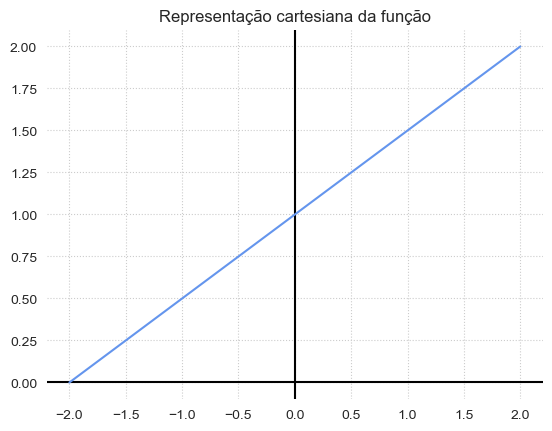

In [16]:
fig, ax = plt.subplots()

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

plt.grid(linestyle='dotted')
ax.spines[["top","bottom","left","right"]].set_visible(False)

plot = sns.lineplot(
    x=valores_x, y=valores_y, color="cornflowerblue",ax=ax).set(
    title="Representação cartesiana da função")

In [5]:
def correlacao_pearson(x, y):
    if len(x)==len(y) and (isinstance(x, np.ndarray) and isinstance(y, np.ndarray)):
        somatoria_medias = sum((x - x.mean()) * (y - y.mean()))
        somatoria_x_quadrado = sum((x - x.mean()) ** 2)
        somatoria_y_quadrado = sum((y - y.mean()) ** 2)       
        valor_final = somatoria_medias / np.sqrt(somatoria_x_quadrado * somatoria_y_quadrado)
        return valor_final
    
    else:
        raise "Erro no Cálculo. Cheque o formato e tamanho das variáveis."

# correlacao_pearson(np.array(valores_x),np.array(valores_y))

# np.correlate(np.array(valores_x),np.array(valores_y))

# statistics.correlation(valores_x, valores_y)

# df.corr(method="pearson")

### Modelagem da Regressão

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

model_scikit = LinearRegression()
happiness = pd.read_csv("world_happiness_report.csv")

In [58]:
X = happiness.drop(columns="Score")
Y = happiness["Score"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=42)

x_train_simple = x_train["Healthy life expectancy"].to_numpy().reshape((-1, 1))
x_test_simple = x_test["Healthy life expectancy"].to_numpy().reshape((-1, 1))

In [59]:
model_sm = sm.OLS(y_train, sm.add_constant(x_train_simple))
resultado = model_sm.fit()
print(resultado.params)
print(resultado.summary())

const    2.856352
x1       3.546444
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           7.08e-26
Time:                        22:58:42   Log-Likelihood:                -135.65
No. Observations:                 124   AIC:                             275.3
Df Residuals:                     122   BIC:                             280.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [53]:
model_scikit_simple = model_scikit.fit(x_train_simple, y_train)
coeficiente_determinacao = model_scikit.score(x_test_simple, y_test)

2.7465959467558396